# FFT
## まずは簡単な時系列データから


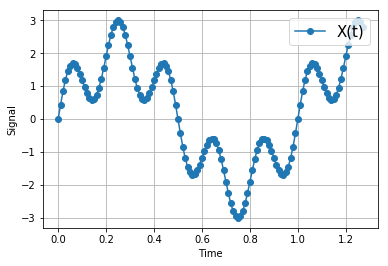

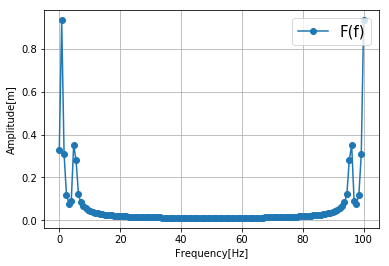

In [19]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain
import scipy as sy
from scipy import signal

N     =2**7                     # サンプル数
dt    =0.01                     # サンプリング間隔
f1,f2 = 1, 5                    # 周波数[Hz]
t     = np.arange(0.0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N) #Hz

X = 2.0*np.sin(2*np.pi*f1*t) + 1.0*np.sin(2*np.pi*f2*t)# + 0.3 * np.random.randn(N) # サンプル時系列データが入っている配列

plt.figure()
plt.plot(t, X, marker='o', label='X(t)')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

F = np.abs(np.fft.fft(X))/N  #FFT

"""複素数のまま"""
plt.plot(freq,np.abs(F), marker='o', label='F(f)')
#plt.xlim(0,10)  #x軸のグラフの範囲設定
#plt.ylim(0,10)  #y軸のグラフの範囲設定
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude[m]')
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


### 左右対称なグラフとなっている．
- 後半側に出現してるピークは複素共役の鏡像となって出現している．詳しくはサンプリング定理で．

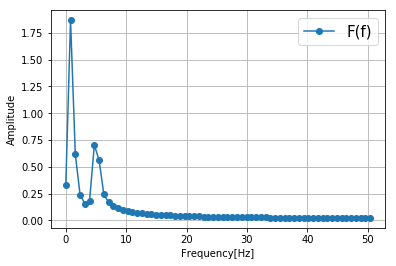

In [18]:
N     =2**7                     # サンプル数
dt    =0.01                     # サンプリング間隔
f1,f2 = 1, 5                    # 周波数[Hz]
t     = np.arange(0.0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N) #Hz

X = 2.0*np.sin(2*np.pi*f1*t) + 1.0*np.sin(2*np.pi*f2*t)# + 0.3 * np.random.randn(N) # サンプル時系列データが入っている配列

F = np.abs(np.fft.fft(X))  #FFT

"""データの半分まで"""
F = F/N*2                  # 振幅スペクトル
F[0]=F[0]/2

plt.plot(freq[:int(N/2)+1],np.abs(F)[:int(N/2)+1], marker='o', label='F(f)')
#plt.ylim(0,4)
#plt.xlim(0,10)
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
plt.show()

### 振幅が少し小さくなっている．
- フーリエ変換とは周期関数であることが前提になっている．つまり，データの始まりと終わりが同じ値になっている必要がある．
- しかし，今回は同じになっていない．そこで，周期関数をつくって再度試してみる．

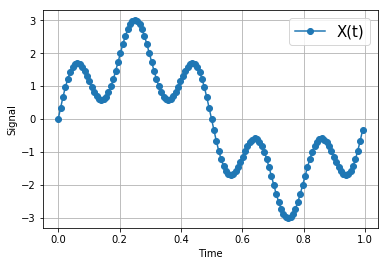

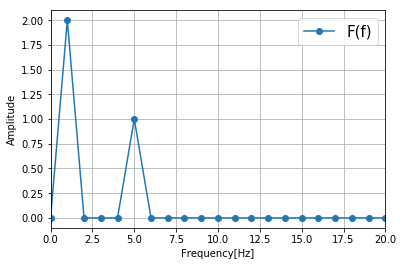

C:\anaconda\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  .format(nperseg, input_length))


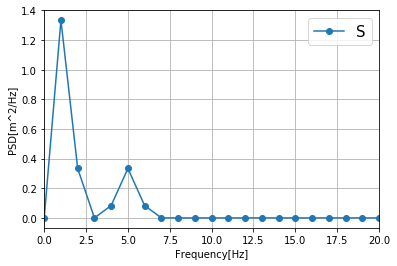

In [17]:
from scipy import signal
import scipy
N     =2**7                     # サンプル数
dt    =0.01                     # サンプリング間隔
f1,f2 = 1, 5                    # 周波数[Hz]

t     = np.arange(0, N, 1)/N # 時間軸
freq = np.arange(0, N, 1)    #Hz(変更してる)
X = 2.0*np.sin(2*np.pi*f1*t) + 1.0*np.sin(2*np.pi*f2*t)# + 0.3 * np.random.randn(N) # サンプル時系列データが入っている配列

plt.figure()
plt.plot(t, X, marker='o', label='X(t)')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

F = np.fft.fft(X)  #FFT

"""変換後"""
F = F/N*2                  # 振幅スペクトル
F[0]=F[0]/2

plt.plot(freq[:int(N/2)+1] , np.abs(F)[:int(N/2)+1], marker='o', label='F(f)')
plt.xlim(0,20)  #x軸のグラフの範囲設定
#plt.ylim(0,10)  #y軸のグラフの範囲設定
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


"""周波数スペクトル"""
freq2,S= scipy.signal.welch(X,1/(t[1]-t[0]),scaling='density')# 1/dt)

plt.plot(freq2 , S, marker='o', label='S')
plt.xlim(0,20)  #x軸のグラフの範囲設定
#plt.ylim(0,10)  #y軸のグラフの範囲設定
plt.xlabel('Frequency[Hz]')
plt.ylabel('PSD[m^2/Hz]')
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

- スペクトルへの変換(scipy.signal.welch)は次の公式サイト参照
- https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.signal.welch.html

### ハイパスフィルターの実行

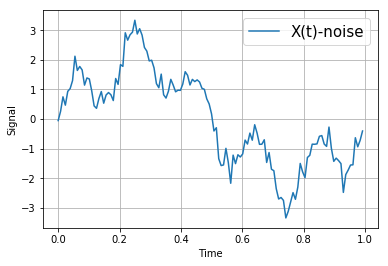

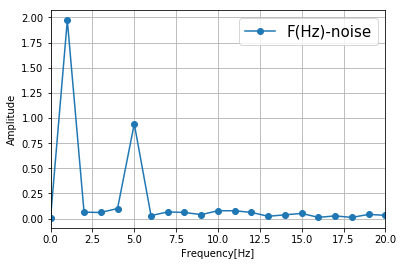

C:\Users\kouzou\Anaconda3\lib\site-packages\scipy\signal\spectral.py:1773: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  .format(nperseg, input_length))


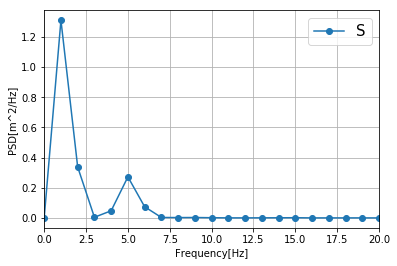

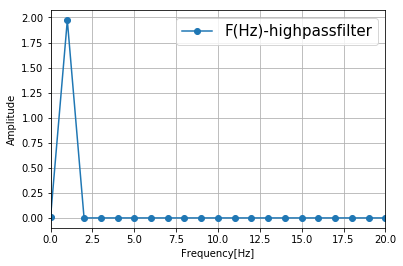

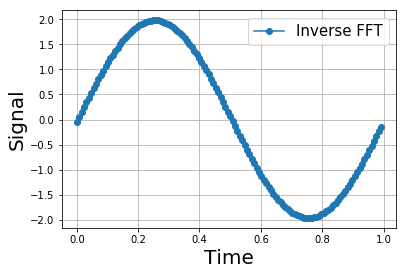

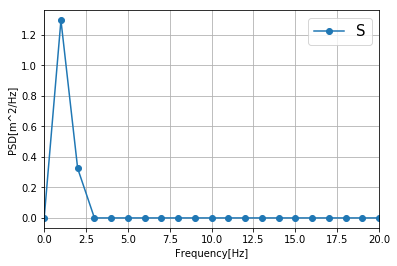

In [87]:
N     =2**7                     # サンプル数
dt    =0.01                     # サンプリング間隔
f1,f2 = 1, 5                    # 周波数[Hz]

t     = np.arange(0, N, 1)/N # 時間軸
freq = np.arange(0, N, 1)    #Hz(変更してる)
X = 2.0*np.sin(2*np.pi*f1*t) + 1.0*np.sin(2*np.pi*f2*t)+ 0.3 * np.random.randn(N) #ランダムノイズをまぜた

plt.figure()
plt.plot(t, X, label='X(t)-noise')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


"""変換後"""
F = np.fft.fft(X)  #FFT
F = F/N*2                  # 振幅スペクトル
F[0]=F[0]/2

plt.plot(freq[:int(N/2)+1] , np.abs(F)[:int(N/2)+1], marker='o', label='F(Hz)-noise')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.xlim(0,20)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""周波数スペクトル"""
freq2,S= signal.welch(X, 1/(t[1]-t[0]),scaling='density')

plt.plot(freq2 , S, marker='o', label='S')
plt.xlim(0,20)  #x軸のグラフの範囲設定
#plt.ylim(0,10)  #y軸のグラフの範囲設定
plt.xlabel('Frequency[Hz]')
plt.ylabel('PSD[m^2/Hz]')
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""ハイパスフィルター"""
F2=F.copy()
F2[(freq>1)]=0 #4[Hz]以上をカット

plt.plot(freq[:int(N/2)+1] , np.abs(F2)[:int(N/2)+1], marker='o', label='F(Hz)-highpassfilter')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.xlim(0,20)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


"""逆フーリエ変換で時系列データに戻す"""
f2=np.fft.ifft(F2)
f2=np.real(f2*N)

plt.plot(t, f2, marker='o', label='Inverse FFT')
plt.xlabel("Time", fontsize=20)
plt.ylabel("Signal", fontsize=20)
plt.grid()
leg = plt.legend(loc=1, fontsize=15)
#leg.get_frame().set_alpha(1)
plt.show()

"""周波数スペクトル"""
freq2,S= signal.welch(f2, 1/(t[1]-t[0]),scaling='density')

plt.plot(freq2 , S, marker='o', label='S')
plt.xlim(0,20)  #x軸のグラフの範囲設定
#plt.ylim(0,10)  #y軸のグラフの範囲設定
plt.xlabel('Frequency[Hz]')
plt.ylabel('PSD[m^2/Hz]')
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

## 実際のデータでFFTを実行してみる

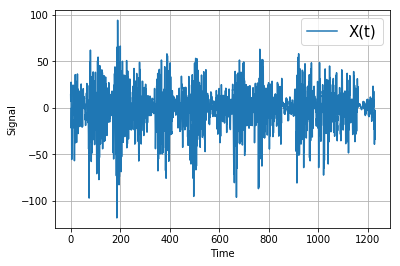

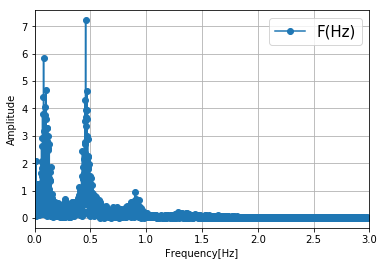

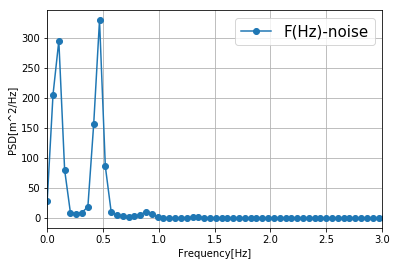

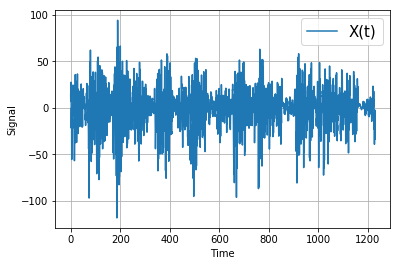

In [30]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain
import scipy as sy
from scipy import signal
N =2**14    # サンプル数
dt =0.075   # サンプリング間隔

t = np.arange(0.0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N)#rad/s
fn=1/dt/2     #ナイキスト周波数

data= pd.read_csv('cygwin.csv', encoding='shift_jis')
a_df = data.values
X1=np.array(a_df[5000:5000+N,0:1])
X=np.array(list((chain.from_iterable(X1))))

"""時系列データ"""
plt.figure()
plt.plot(t, X, label='X(t)')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""変換後"""
F = np.fft.fft(X)  #FFT
F = F/N*2                  # 振幅スペクトル
F[0]=F[0]/2
plt.plot(freq[:int(N/2)+1] , np.abs(F)[:int(N/2)+1], marker='o', label='F(Hz)')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.xlim(0,3)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""周波数スペクトル"""
freq2,S= signal.welch(X, 1/dt,scaling='density') #PSD
plt.plot(freq2,S/(2*np.pi), marker='o', label='F(Hz)-noise')
plt.xlabel('Frequency[Hz]')
plt.ylabel('PSD[m^2/Hz]')
plt.xlim(0,3)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


"""逆フーリエ変換して時系列データへ"""
F2=F.copy()
F2[(freq>fn)]=0   #ナイキスト周波数を除去し忘れてた．

#F2[(freq>0.3)]=0　　#ここでハイパスフィルターを実行
f2=np.fft.ifft(F2)
f2=np.real(f2)*N
plt.figure()
plt.plot(t, f2, label='X(t)')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

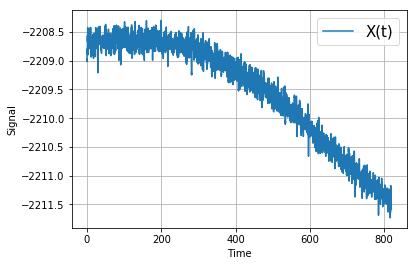

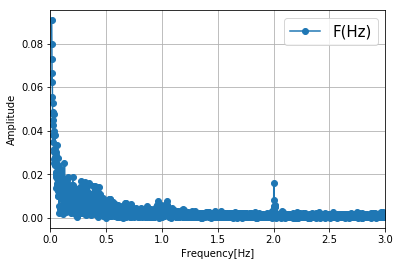

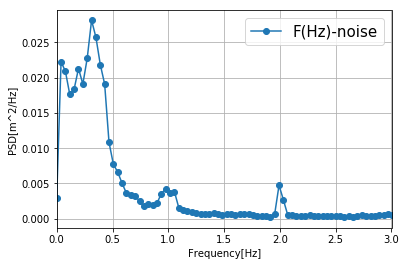

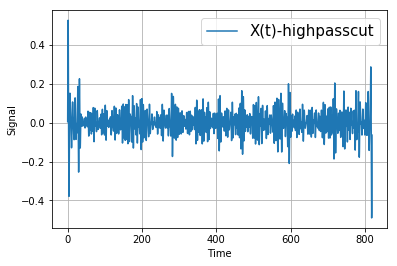

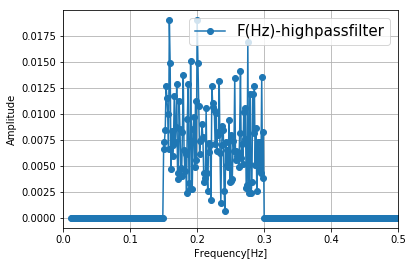

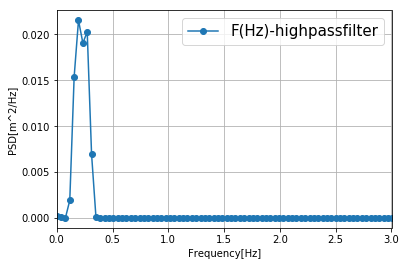

In [12]:
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from itertools import chain
import scipy as sy
from scipy import signal
N =2**13    # サンプル数
dt =0.1   # サンプリング間隔

t = np.arange(0.0, N*dt, dt) # 時間軸
freq = np.linspace(0, 1.0/dt, N)#rad/s
fn=1/dt/2     #ナイキスト周波数

data= pd.read_csv('RawStr_HMS_201606211044min_to_49min.csv', encoding='shift_jis')
a_df = data.values
X1=np.array(a_df[2:2+N,2:3])
X=np.array(list((chain.from_iterable(X1))))

"""時系列データ"""
plt.figure()
plt.plot(t, X, label='X(t)')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""変換後"""
F = np.fft.fft(X)  #FFT
F = F/N*2                  # 振幅スペクトル
F[0]=F[0]/2

plt.plot(freq[10:int(N/2)+1] , np.abs(F)[10:int(N/2)+1], marker='o', label='F(Hz)')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.xlim(0,3)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""周波数スペクトル"""
freq2,S= signal.welch(X, 1/dt,window='hamming', scaling='density') #PSD
plt.plot(freq2,S, marker='o', label='F(Hz)-noise')
plt.xlabel('Frequency[Hz]')
plt.ylabel('PSD[m^2/Hz]')
plt.xlim(0,3)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()


"""逆フーリエ変換して時系列データへ"""
F2=F.copy()
F2[(freq>fn)]=0   #ナイキスト周波数を除去し忘れてた．

F2[(freq<0.15)]=0   #ここでハイパスフィルターを実行
F2[(freq>0.3)]=0
f2=np.fft.ifft(F2)
f2=np.real(f2)*N
plt.figure()
plt.plot(t, f2, label='X(t)-highpasscut')
plt.xlabel("Time")
plt.ylabel("Signal")
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""変換後"""
F3 = np.fft.fft(f2)  #FFT
F3 = F3/N*2                  # 振幅スペクトル
F3[0]=F3[0]/2
F3[(freq>fn)]=0   #ナイキスト周波数を除去し忘れてた．

F3[(freq<0.15)]=0   #ここでハイパスフィルターを実行
F3[(freq>0.3)]=0
plt.plot(freq[10:int(N/2)+1] , np.abs(F3)[10:int(N/2)+1], marker='o', label='F(Hz)-highpassfilter')
plt.xlabel('Frequency[Hz]')
plt.ylabel('Amplitude')
plt.xlim(0,0.5)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()

"""周波数スペクトル"""
freq2,S1= signal.welch(f2, 1/dt,window='hamming', scaling='density') #PSD
plt.plot(freq2,S1, marker='o', label='F(Hz)-highpassfilter')
plt.xlabel('Frequency[Hz]')
plt.ylabel('PSD[m^2/Hz]')
plt.xlim(0,3)
leg = plt.legend(loc=1, fontsize=15)
plt.grid()
plt.show()